In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.2.0-bin-hadoop2.7')

from pyspark.sql import SparkSession

#SparkContext is fundamental starting point for creating RDD's
#You can't create a context until you have a conf. Then tell it thins like:
    #Run this on one machine or a cluster? How?
from pyspark import SparkConf, SparkContext

#Collections is for sorting and filing stuff we've done
import collections

In [2]:
#Create a new spark centext
#Set master node as local machine (not on a cluster), and one core/thread
conf = SparkConf().setMaster('local').setAppName("RatingsHistogram")
sc = SparkContext(conf = conf)

# Extract Data

In [3]:
#Import Data
file = '/u.data'
path = '/home/ubuntu/data/raw/ml-100k'
lines = sc.textFile(name=path+file)
#u.data = lines of strings:
    #[0]  [1]    [2]   [3]
    #User movie# score timestamp
    #196  242    3     881250949
    #186  302    3     891717742
    #22   377    1     87887116 ...


ratings = lines.map(lambda x: x.split()[2])
#Import everything from lines RDD
#Split string (line) and extract rating: [2]
    # 3
    # 3
    # 1
#Put into a new RDD called ratings
#This Map function doesn't change the lines RDD



result = ratings.countByValue()
#Perform an action (three was counted twice, one was counted twice...)
    # 3 -> -> (3, 2), (1, 2), (2,1)
    # 3
    # 1
    # 2
    # 1
#Now, once the action has been performed, we have python object


#Sort
sortedResults = collections.OrderedDict(sorted(result.items()))

for key, value in sortedResults.items():
    print("%s %i" % (key, value))

1 6110
2 11370
3 27145
4 34174
5 21201


# Plot

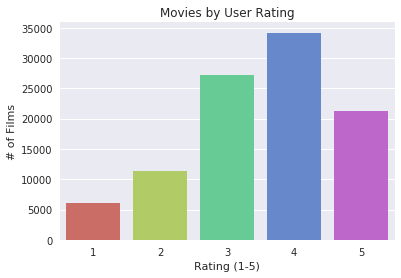

In [4]:
#Plot
from scipy import stats, integrate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

rating = []
count = []
for key, value in sortedResults.items():
    rating.append(key)
    count.append(value)
    
#https://seaborn.pydata.org/tutorial/color_palettes.html
sns.barplot(x=rating, y=count, palette='hls')
plt.title('Movies by User Rating')
plt.xlabel('Rating (1-5)')
plt.ylabel('# of Films')
plt.show()
plt.clf()